In [106]:
import pandas as pd
import numpy as np
import ast
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
import xgboost as xgb
import joblib
from sklearn.metrics import classification_report
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import texthero as hero
from texthero import preprocessing

In [6]:
#import data
df1 = pd.read_csv('/Users/zujiewu/Desktop/Zujie’s MacBook Air/ISE350/project/datanew/covid121.csv')
df2 = pd.read_csv('/Users/zujiewu/Desktop/Zujie’s MacBook Air/ISE350/project/datanew/covid122.csv')
df3 = pd.read_csv('/Users/zujiewu/Desktop/Zujie’s MacBook Air/ISE350/project/datanew/covid123.csv')
df4 = pd.read_csv('/Users/zujiewu/Desktop/Zujie’s MacBook Air/ISE350/project/datanew/covid124.csv')
df5 = pd.read_csv('/Users/zujiewu/Desktop/Zujie’s MacBook Air/ISE350/project/datanew/covid125.csv')

/Users/zujiewu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
df_ht = pd.read_csv('/Users/zujiewu/Desktop/Zujie’s MacBook Air/ISE350/project/data/cleaned_data.csv')

In [45]:
X_train = df_ht['tweet'].values

In [46]:
X_train

array(["['covid19', 'era', 'normal', 'influenza', 'season', 'lot', 'peopl', 'icu', 'death', 'well', '13ish', 'italian', 'contaminatedfew', 'year', 'ago', 'time', 'talk', 'lockdown', 'restrict', 'greenpass', 'supergreenpass', 'today', '']",
       "['covid19', 'era', 'normal', 'influenza', 'season', 'lot', 'peopl', 'icu', 'death', 'well', '13ish', 'italian', 'contaminatedfew', 'year', 'ago', 'time', 'talk', 'lockdown', 'restrict', 'greenpass', 'supergreenpass', 'today', '']",
       "['brussel', 'march', 'greenpass', 'novaccinepassport', 'novaccinemand', 'pasaportecovid', 'vacunacovid19', 'greenpassobbligatorio', 'passaportesanitarionao', 'nogreenpass', 'vaccinationobligatoir', 'catnoalpasscovid']",
       ...,
       "['dr', 'fleme', 'covid', 'caus', 'solut', 'covid19', 'covid1984', 'covidiot', 'vaccinesideeffect', 'vaccinepassport', 'vaccinedeath', 'vaccinemand', 'fauciliedpeopledi', 'resist', 'cdc', 'naturalimmun', 'protectyourfamili', 'remdisivirkil', 'crimesagainsthuman', 'httpstco

In [37]:
#concat
frames = [df1, df2, df3,df4,df5]
df = pd.concat(frames)
df = df[df['language'] == 'en']

In [52]:
#subset data
df_new = df.iloc[:,10:11]

In [53]:
X_test = df_new['tweet']

In [54]:
X_test = X_test.values

In [55]:
X_test

array(['Sarah Gilbert: Next pandemic could be more lethal than Covid  https://t.co/XfC5FxFbYp',
       'Ah Zendaya was there!!! Sadly, due to COVID, no kissing and hugging like its a wedding reception huhu  https://t.co/22jtWjFN7R',
       'Will you stand up for workers and support transitioning fur farmers to other sectors @erinotoole?   Fur farms spread COVID-19 and put workers at risk.  It’s time to #MakeFurFarmsHistory  https://t.co/53FITYYczT',
       ...,
       '@pmak27 @phoward1974 @ymmot1960 @GBNEWS I agree with you. There is no point to wearing a mask if your not worried about covid',
       '@mtracey A famous viewing tower at the Grand Canyon was closed when I visited last week, I asked why, they said "COVID", I asked "forever?", they said "until everybody gets vaccinated".  🤷\u200d♂️',
       'Putin needs to think twice before swallowing up Ukraine at this point... Covid, possible Anthrax in the future, and real war with not only the Ukrainians resistance and military, but 

**tf-idf vec data**

In [56]:
vec = TfidfVectorizer(max_features = 100)
X_tr = vec.fit_transform(X_train)
X_tst  = vec.transform(X_test)

In [57]:
X_tst

<72874x100 sparse matrix of type '<class 'numpy.float64'>'
	with 194935 stored elements in Compressed Sparse Row format>

**Prediction, predict hashtags for covid related tweet**

In [58]:
#load model
loaded_model = joblib.load('/Users/zujiewu/Desktop/Zujie’s MacBook Air/ISE350/project/Untitled Folder/xgb_tfidf.sav')

In [60]:
prediction = loaded_model.predict(X_tst)

In [64]:
prediction.shape

(72874,)

In [62]:
#result distribution
(unique, counts) = np.unique(prediction, return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [63]:
frequencies

array([['australia', '402'],
       ['biden', '1984'],
       ['canada', '349'],
       ['cdnpoli', '32'],
       ['corona', '40'],
       ['coronavirus', '1'],
       ['covid', '570'],
       ['covid19', '743'],
       ['covidiots', '8'],
       ['freedom', '501'],
       ['germany', '56'],
       ['greenpass', '9'],
       ['italy', '14912'],
       ['letsgobrandon', '2907'],
       ['lockdown', '403'],
       ['news', '1479'],
       ['nogreenpass', '3'],
       ['novaccinepassport', '1'],
       ['nyc', '514'],
       ['omicronvariant', '2301'],
       ['omicronvarient', '23'],
       ['onpoli', '1'],
       ['pandemic', '12'],
       ['protests', '9'],
       ['resist', '2'],
       ['usa', '190'],
       ['vaccine', '4'],
       ['vaccinemandate', '45407'],
       ['vaccinepassport', '3'],
       ['vaccineswork', '8']], dtype='<U26')

In [94]:
#find text which is labeled as related with vaccine passport
searchval = ('vaccinepassport')
ii = np.where(prediction == searchval)[0]

In [95]:
a = ii.tolist()
text1 = [X_test[x] for x in a]

In [132]:
searchval = ('greenpass')
ii2 = np.where(prediction == searchval)[0]
a = ii2.tolist()
text2 = [X_test[x] for x in a]

In [133]:
searchval = ('vaccinemandate')
ii3 = np.where(prediction == searchval)[0]
a = ii3.tolist()
text3 = [X_test[x] for x in a]

In [134]:
#concatenate
text = text1 + text2 +text3

In [135]:
df_text = pd.DataFrame()
df_text['text'] = text

In [136]:
#clean text
#data cleaning
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_stopwords
                   , preprocessing.remove_urls
                   , preprocessing.remove_whitespace
                  , preprocessing.stem]
df_cleaned = pd.DataFrame()
df_cleaned['text'] = hero.clean(df_text['text'],pipeline = custom_pipeline)

In [137]:
text = df_cleaned.text.values

In [117]:
text

array(['enjoy canada vaccinefailur mean boostershot forev unless give vaccinepassport stand covid19 covid 19 novaccinemand nomedicalapartheid',
       'protest clash polic brussel demonstr sanitari pass restrict covid 19 vaccinepassport healthpass demonstr protest brussel belgium covid19 co nfpfscleg0',
       'like share experi got intern certif covid vaccin thailand read co tmqfaz6ab3 internationalcertificateofcovid19vaccin aibrabr`ngkaarchiidwakhchiinokhwid vaccinepassport wakhchiinphaasp`rt vaccinecovid19 co rh0xl9iqmw',
       ..., 'rapid covid test result negative... wait test result',
       'mtracey famous view tower grand canyon close visit last week ask said covid ask forev said everybodi get vaccin',
       'putin need think twice swallow ukrain point covid possibl anthrax futur real war ukrainian resist militari also nato hope common sens left time kgb'],
      dtype=object)

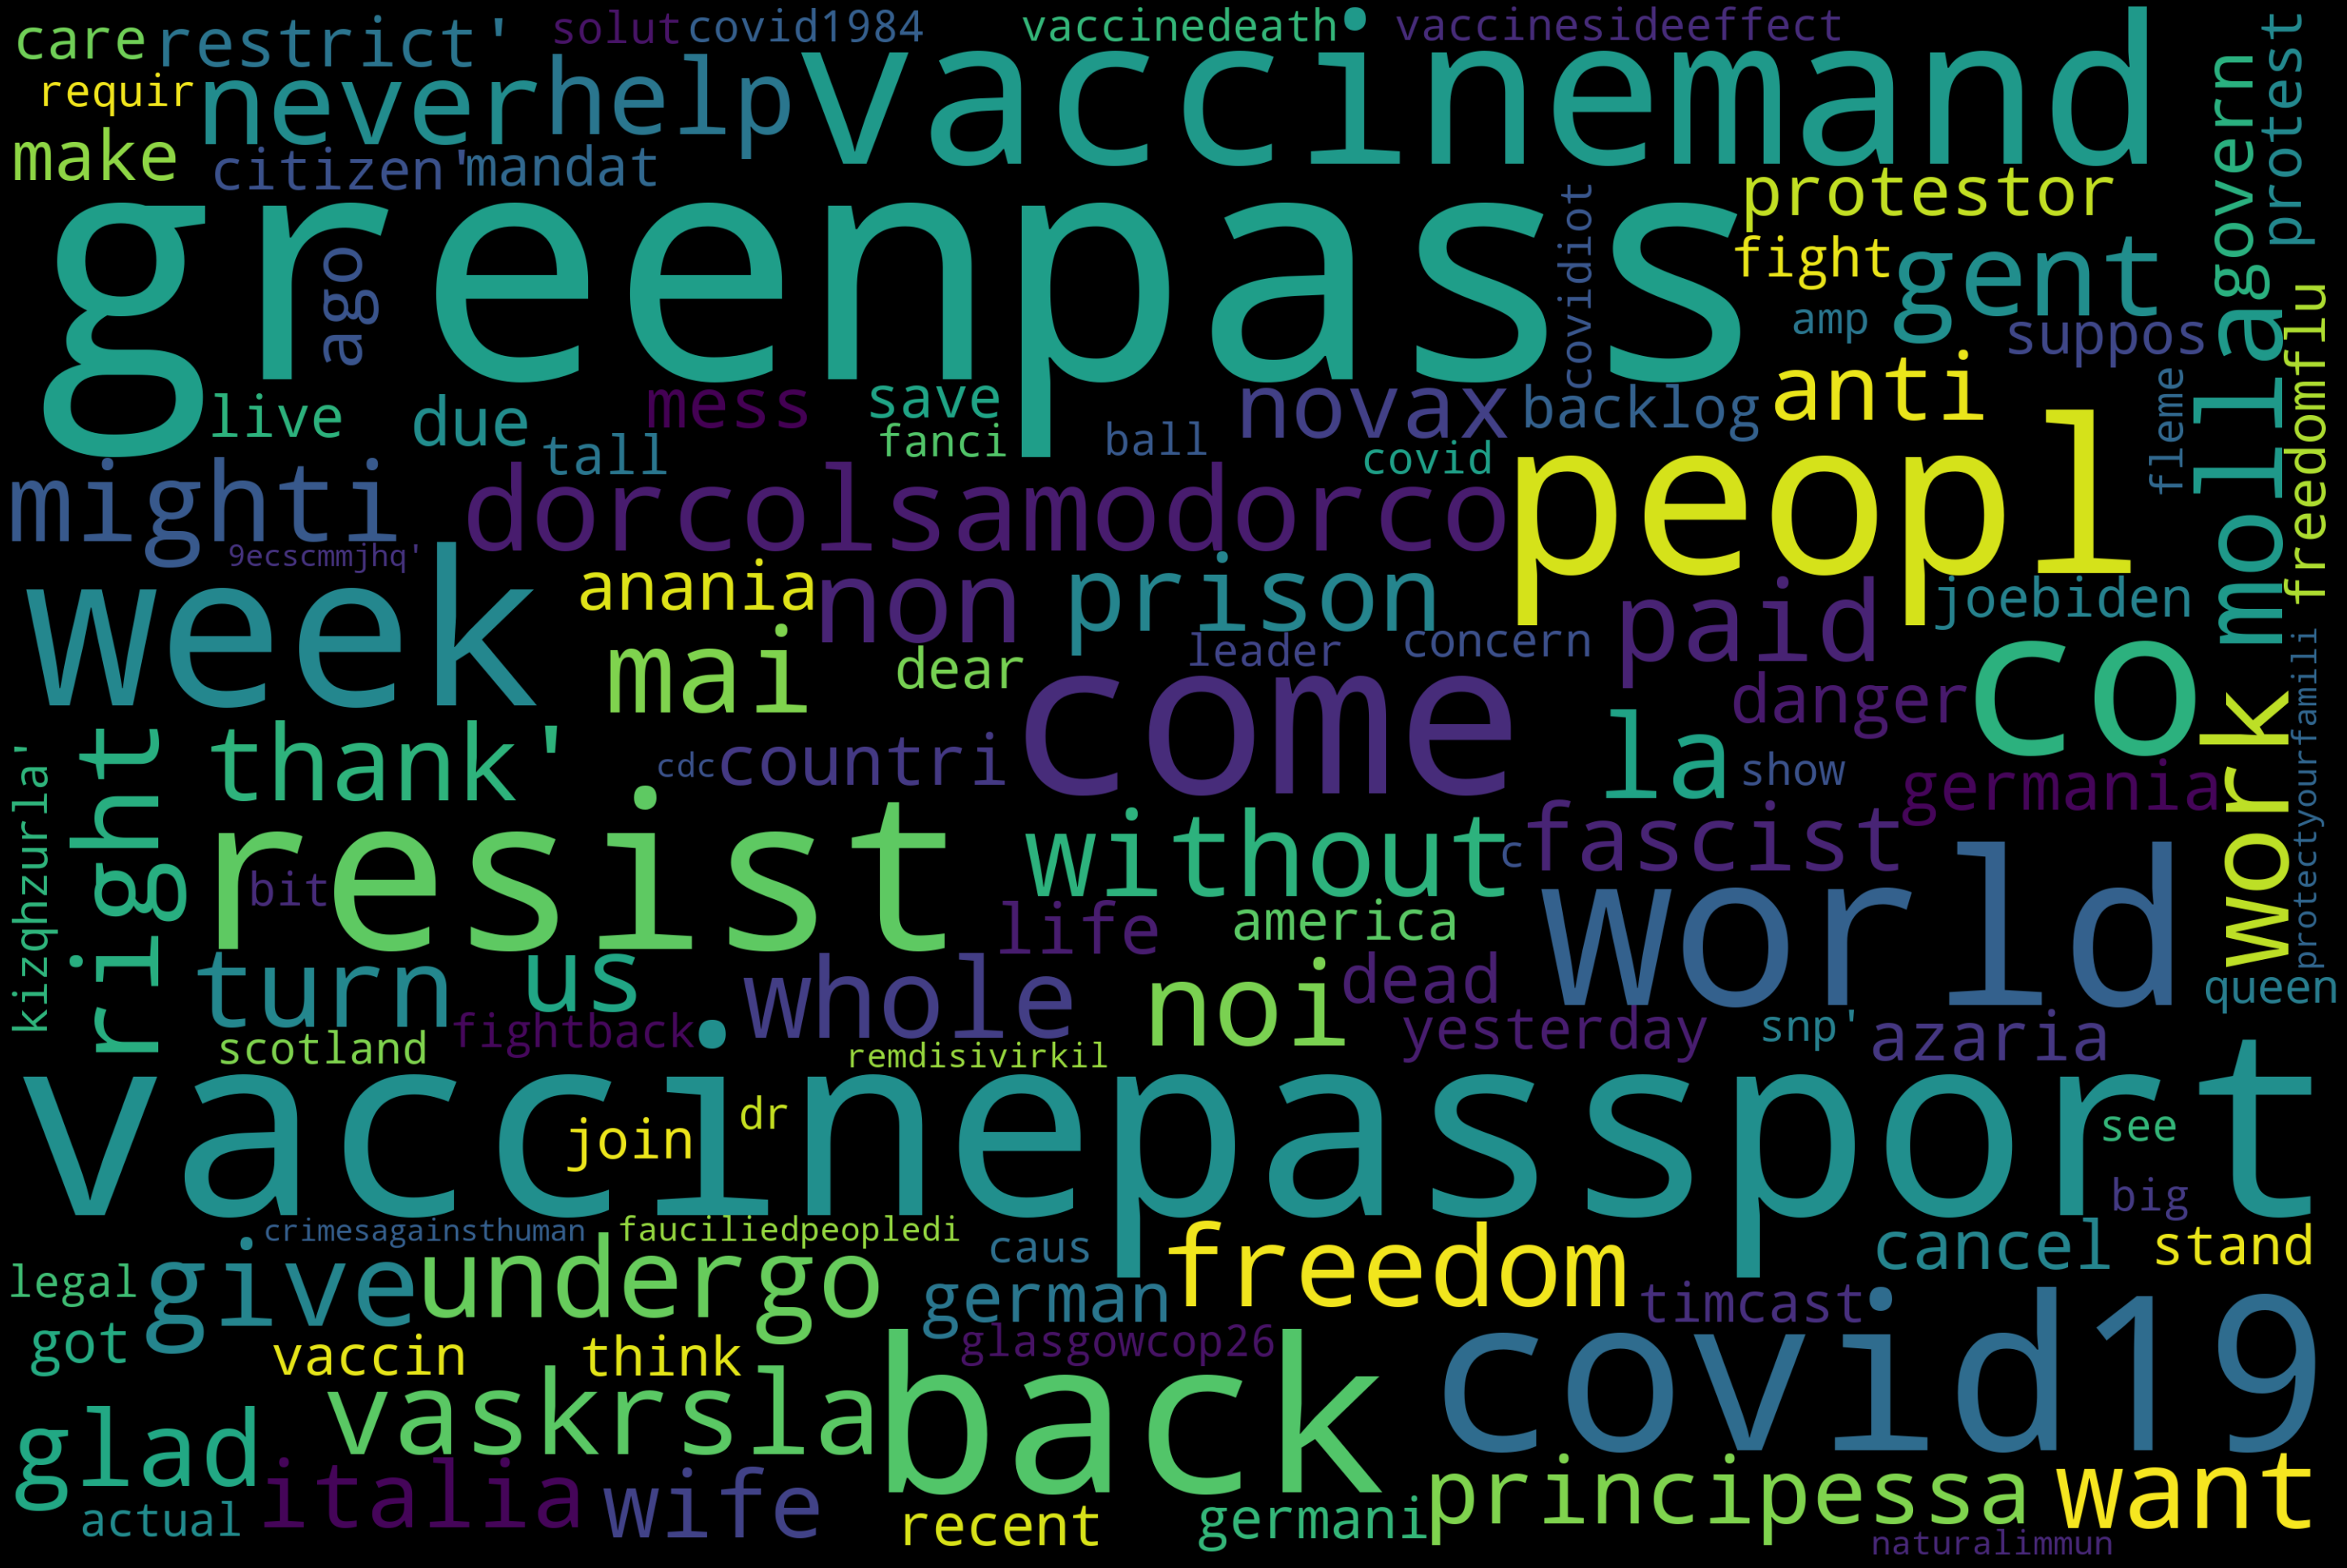

In [121]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Topic Modeling**

In [125]:
import gensim
from gensim.utils import simple_preprocess
import nltk

In [138]:
df_cleaned

,text
0,enjoy canada vaccinefailur mean boostershot fo...
1,protest clash polic brussel demonstr sanitari ...
2,like share experi got intern certif covid vacc...
3,chrisb95216897 independ ie happen opinion thre...
4,toraykortan doubl mask nice touch printwork ev...
...,...
45414,chuzbucket thedailyshow allud long term effect...
45415,studi failur compulsori covid intervent mask m...
45416,rapid covid test result negative... wait test ...
45417,mtracey famous view tower grand canyon close v...


In [139]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_cleaned['text'].values.tolist()
data_words = list(sent_to_words(data))

In [144]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [146]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.063*"covid" + 0.020*"vaccin" + 0.018*"peopl" + 0.015*"get" + 0.011*"co" + '
  '0.009*"year" + 0.007*"like" + 0.005*"work" + 0.005*"die" + 0.004*"amp"'),
 (1,
  '0.070*"covid" + 0.043*"co" + 0.029*"vaccin" + 0.010*"get" + 0.008*"amp" + '
  '0.005*"new" + 0.005*"death" + 0.004*"health" + 0.004*"test" + '
  '0.004*"hospit"'),
 (2,
  '0.072*"covid" + 0.033*"co" + 0.014*"test" + 0.011*"case" + 0.010*"variant" '
  '+ 0.010*"omicron" + 0.008*"get" + 0.008*"new" + 0.007*"vaccin" + '
  '0.006*"day"'),
 (3,
  '0.070*"covid" + 0.031*"co" + 0.012*"vaccin" + 0.007*"like" + 0.007*"new" + '
  '0.006*"variant" + 0.006*"get" + 0.005*"peopl" + 0.005*"test" + '
  '0.005*"case"'),
 (4,
  '0.049*"covid" + 0.031*"co" + 0.013*"vaccin" + 0.006*"amp" + 0.005*"case" + '
  '0.005*"get" + 0.005*"new" + 0.005*"die" + 0.004*"infect" + 0.004*"via"'),
 (5,
  '0.061*"covid" + 0.014*"vaccin" + 0.008*"get" + 0.007*"got" + 0.007*"die" + '
  '0.007*"co" + 0.007*"test" + 0.006*"booster" + 0.006*"shot" + 0.005*"li